In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import random
import scipy.stats as stats
import math
import pandas as pd

In [ ]:
lam=0.2
k=20
d=23
sig=5

In [ ]:
xgd=lambda x,d: 1 if x>d else 0
xgdvec=np.vectorize(xgd,excluded="d")

In [ ]:
def estimate_sig_Pickands(n,k,lam,d):
    X=np.random.exponential(scale=1/lam,size=(n,k))

    S=list()

    for xnk in np.nditer(X):
        if xgd(xnk,d):
            S.append(xnk-d)         #obtaining s values
    l=len(S)
    sig_e=np.nanmean(S)                       #MLE formula
    return sig_e,l
    

In [ ]:
#running for different n values and logging
runs=1000
nval=np.logspace(0,4,num=5,dtype=int)
sig_e=np.empty((runs,len(nval)),dtype=float)
L=np.empty((runs,len(nval)),dtype=float)
for j,n in enumerate(nval):
    for i in range(runs):
        sig_e[i,j],L[i,j]=estimate_sig_Pickands(n,k,lam,d)

for i in range(runs):
  add_log(data,np.concatenate((sig_e[i,:],L[i,:])))


In [ ]:
#run from here to use spreadsheet
auth.authenticate_user()
gc = gspread.authorize(GoogleCredentials.get_application_default())
worksheet = gc.open_by_url(data).get_worksheet(0)
#print(pd.DataFrame(worksheet.get_all_values()).head())
vals=pd.DataFrame(worksheet.get_all_values()).to_numpy()
vals=np.delete(vals,0,axis=0)
sig_e=vals[:,:5].astype(float)
L=vals[:,5:].astype(float)

runs1=sig_e.shape[0]

In [ ]:
sig_ecap=np.nanmean(sig_e,axis=0)
sig_var=np.nanvar(sig_e,axis=0)


In [ ]:
for j,n in enumerate(nval):
    print(nval[j],"Var:",sig_var[j],"Exp:",sig_ecap[j])

1 Var: 21.466138818637326 Exp: 4.933202781057038
10 Var: 15.253559332181307 Exp: 5.041180307579298
100 Var: 1.2920245682777656 Exp: 5.033818442544537
1000 Var: 0.1239916911412661 Exp: 5.005186863384532
10000 Var: 0.012472071364237178 Exp: 4.998195123311016


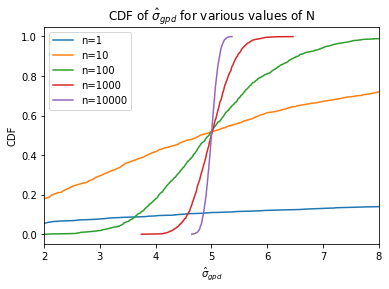

In [ ]:
#cdf
s=1
x=np.arange(0,10,0.01)
probs=np.array(range(runs1))/float(runs1)
for j,n in enumerate(nval):
    sortVal = np.sort(sig_e[:,j])
    plt.plot(sortVal, probs,label="n={n}".format(n=n))
plt.xlim([2,8])
plt.legend()
plt.title(r"CDF of $\hat{\sigma}_{gpd}$ for various values of N")
plt.xlabel(r"$\hat{\sigma}_{gpd}$")
plt.ylabel("CDF")
# plt.savefig('3_1.png')
plt.show()

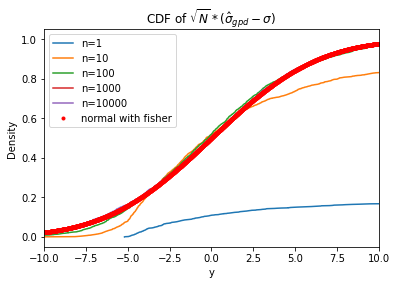

In [ ]:
#cdf with fisher
s=1
x=np.arange(-10,10,0.01)                 
fisher=1/sig**2
sig_ecor=np.multiply(np.sqrt(L),(sig_e-sig))

probs=np.array(range(runs1))/float(runs1)
for j,n in enumerate(nval):
    sortVal = np.sort(sig_ecor[:,j])
    plt.plot(sortVal, probs,label="n={n}".format(n=n))
plt.plot(x,stats.norm.cdf(x, 0, np.sqrt(1/fisher)),'r.', label="normal with fisher")
plt.xlim([-10,10])
plt.title(r"CDF of $\sqrt{N}*(\hat{\sigma}_{gpd} - \sigma)$")
plt.xlabel("y")
plt.ylabel("Density")
plt.legend()
# plt.savefig('3_2.png')
plt.show()

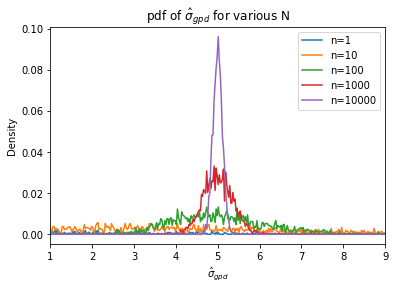

In [ ]:
/.#PDF
width=0.025 
b=np.arange(0,10,width)
for j,n in enumerate(nval):
    if n!=0:
        probs, b = np.histogram(sig_e[:,j], bins=b) # bin it into n = N//10 bins
        probs=probs/runs1
        bincentre = b[:-1] + (b[1] - b[0])/2   # convert bin edges to centers
        plt.plot(bincentre, probs,label="n={n}".format(n=n))                                        #for line plot
        #plt.bar(bincentre, probs, align = 'center', width = width,label="n={n}".format(n=n))       #for bar plot

plt.xlim([1,9])
plt.title("pdf of $\hat{\sigma}_{gpd}$ for various N")
plt.xlabel("$\hat{\sigma}_{gpd}$")
plt.ylabel("Density")
plt.legend()
# plt.savefig(f"3_3.png")
plt.show()
